In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

In [2]:
#Store Mass Shooting CSV into DataFrame
mass_all = "./resources/mass_shootings_all.csv"
mass_shooting_df = pd.read_csv(mass_all)
mass_shooting_df.head()



,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"November 26, 2016",Illinois,Chicago,8800 block of South Exchange Avenue,1,5,NaN
1,"November 25, 2016",Louisiana,New Orleans,Magnolia and Felicity Street,0,4,NaN
2,"November 24, 2016",Kentucky,Louisville,4501 W Broadway,2,5,NaN
3,"November 24, 2016",New York,Albany,77 Central Avenue,1,3,NaN
4,"November 23, 2016",Mississippi,Olive Branch,928 Cross Road,0,4,NaN


In [3]:
#Clean Mass Shooting DataFrame
new_mass_shooting_df = mass_shooting_df[['State', 'City Or County', '# Killed', '# Injured']].copy()
new_mass_shooting_df.head()

#Rename Columns
clean_mass_shooting_df = new_mass_shooting_df.rename(columns={"Incident Date":"Incident_Date", "State":"State", "# Killed":"Num_Killed", "# Injured":"Num_Injured"})
clean_mass_shooting_df.head()

,State,City Or County,Num_Killed,Num_Injured
0,Illinois,Chicago,1,5
1,Louisiana,New Orleans,0,4
2,Kentucky,Louisville,2,5
3,New York,Albany,1,3
4,Mississippi,Olive Branch,0,4


In [4]:
## Sample queries to address some of project questions

#Which States have the highest number of incidents (killed v. injured)
# Mass Shootings:

Mass_Shootings_State = clean_mass_shooting_df.groupby("State").count().sort_values(["Num_Killed", "Num_Injured"], ascending=False)
Mass_Shootings_State

,City Or County,Num_Killed,Num_Injured
State,,,
Illinois,54,54,54
California,52,52,52
Florida,42,42,42
Texas,35,35,35
Georgia,23,23,23
Louisiana,22,22,22
New York,19,19,19
Pennsylvania,19,19,19
Tennessee,17,17,17


In [5]:
#Clean Mass Shooting DataFrame
new_mass_shooting_df = mass_shooting_df[['State', '# Killed', '# Injured']].copy()
new_mass_shooting_df.head()

#Rename Columns
clean_mass_shooting_df = new_mass_shooting_df.rename(columns={"State":"State", "# Killed":"Num_Killed", "# Injured":"Num_Injured"})
clean_mass_shooting_df.head()

,State,Num_Killed,Num_Injured
0,Illinois,1,5
1,Louisiana,0,4
2,Kentucky,2,5
3,New York,1,3
4,Mississippi,0,4


In [6]:
print(clean_mass_shooting_df.query("State in ('California', 'Texas', 'New York', 'Illinois', 'Florida', 'Michigan', 'Oregon', 'Mass', 'Louisiana', 'Colorado')"))

         State  Num_Killed  Num_Injured
0     Illinois           1            5
1    Louisiana           0            4
3     New York           1            3
5      Florida           1            4
6     Illinois           0            4
..         ...         ...          ...
490    Florida           0            4
492   Illinois           0            5
494  Louisiana           0            4
497  Louisiana           3            9
499    Florida           1            3

[249 rows x 3 columns]


In [7]:
mass_all = "./resources/mass_shootings_all.csv"
all_df = pd.read_csv(mass_all)
all_df

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"November 26, 2016",Illinois,Chicago,8800 block of South Exchange Avenue,1,5,NaN
1,"November 25, 2016",Louisiana,New Orleans,Magnolia and Felicity Street,0,4,NaN
2,"November 24, 2016",Kentucky,Louisville,4501 W Broadway,2,5,NaN
3,"November 24, 2016",New York,Albany,77 Central Avenue,1,3,NaN
4,"November 23, 2016",Mississippi,Olive Branch,928 Cross Road,0,4,NaN
...,...,...,...,...,...,...,...
495,"July 25, 2015",Virginia,Hopewell,500 block of N. 7th Ave,0,4,NaN
496,"July 24, 2015",Pennsylvania,Erie,200 block of West 29th Street,2,4,NaN
497,"July 23, 2015",Louisiana,Lafayette,3141 Johnson Street,3,9,NaN
498,"July 22, 2015",Georgia,Suwanee,5500 block of Old Atlanta Road,5,0,NaN


In [8]:

# Create a filtered dataframe from specific columns
all_cols = ["State"]
all_transformed= all_df[all_cols].copy()


# Rename the column headers
#all_transformed = all_transformed.rename(columns={"State": "State", "# Killed": "premise_name")
                                                     
# Clean the data by dropping duplicates and setting the index
#all_transformed.drop_duplicates("id", inplace=True)
#all_transformed.set_index("id", in




all_transformed

,State
0,Illinois
1,Louisiana
2,Kentucky
3,New York
4,Mississippi
...,...
495,Virginia
496,Pennsylvania
497,Louisiana
498,Georgia


In [11]:
mass_occurances = all_transformed.groupby(['State']).size().sort_values(ascending=False).unique

In [12]:
display(mass_occurances)

<bound method Series.unique of State
Illinois                54
California              52
Florida                 42
Texas                   35
Georgia                 23
Louisiana               22
Pennsylvania            19
New York                19
Tennessee               17
Alabama                 15
Ohio                    15
Michigan                14
Maryland                14
Missouri                14
Indiana                 13
South Carolina          12
Virginia                12
North Carolina          12
Minnesota               10
New Jersey               9
Washington               9
Colorado                 8
Mississippi              7
District of Columbia     6
Arizona                  6
Connecticut              5
Kansas                   5
Nevada                   4
New Mexico               4
Arkansas                 4
Massachusetts            3
Oregon                   3
Delaware                 2
Wisconsin                2
Oklahoma                 2
Kentucky          

In [30]:
Gun_Violence_Ranking= {
    'States':['Illinois', 'California', 'Florida','Texas', 'Louisiana', 'New York', 'Michigan', 'Colorado', 'Oregon', 'Mass' ],
    'Mass_Shooting_Occurences' :[54, 52,42,35,22,19,14,8,3,3]
          }
df = pd.DataFrame(Gun_Violence_Ranking)
print(df)

       States  Mass_Shooting_Occurences
0    Illinois                        54
1  California                        52
2     Florida                        42
3       Texas                        35
4   Louisiana                        22
5    New York                        19
6    Michigan                        14
7    Colorado                         8
8      Oregon                         3
9        Mass                         3


<AxesSubplot:>

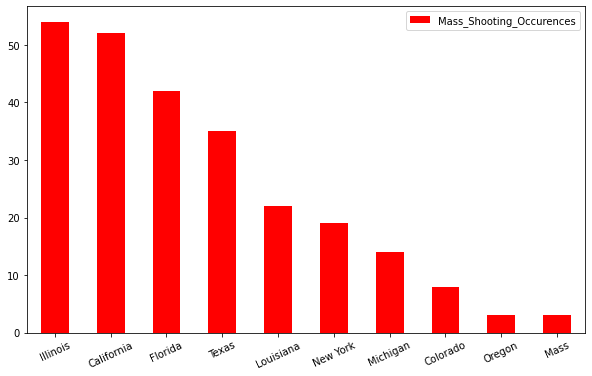

In [60]:
plotdata = pd.DataFrame(
    {"Mass_Shooting_Occurences": [54, 52,42,35,22,19,14,8,3,3]}, 
    index=['Illinois', 'California', 'Florida','Texas', 'Louisiana', 'New York', 'Michigan', 'Colorado', 'Oregon', 'Mass'])
# Plot a bar chart
plotdata.plot(kind="bar", rot=25,figsize= (10,6), color='r')

In [45]:
#Store Mass Shooting CSV into DataFrame
Gun_Policy = "./resources/Joined_Gun_data.csv"
Gun_Policy_df = pd.read_csv(Gun_Policy)
Gun_Policy_df.head()


,State,policy_score,total_mass_shootings,policy_level,Unnamed: 4,Unnamed: 5
0,Illinois,65,54,Average,NaN,NaN
1,California,76,52,Restrictive,NaN,NaN
2,Florida,47,42,Average,NaN,NaN
3,Texas,36,35,Relaxed,NaN,NaN
4,Georgia,17,23,Relaxed,NaN,NaN


In [46]:
#Clean Mass Shooting DataFrame
new_Gun_Policy_df = Gun_Policy_df[['State', 'total_mass_shootings', 'policy_level']].copy()
new_Gun_Policy_df.head()


,State,total_mass_shootings,policy_level
0,Illinois,54,Average
1,California,52,Restrictive
2,Florida,42,Average
3,Texas,35,Relaxed
4,Georgia,23,Relaxed


<AxesSubplot:>

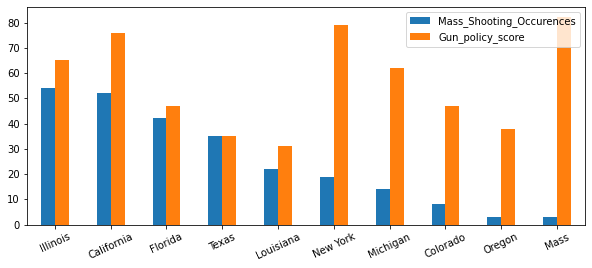

In [59]:
plotdata = pd.DataFrame({
    "Mass_Shooting_Occurences":[54, 52,42,35,22,19,14,8,3,3],
    "Gun_policy_score":[65, 76, 47, 35, 31,79,62,47,38,82],
   
    }, 
    index=['Illinois', 'California', 'Florida','Texas', 'Louisiana', 'New York', 'Michigan', 'Colorado', 'Oregon', 'Mass']
)
plotdata.plot(kind="bar", rot=25,figsize= (10,4),)
